# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

The members of {**2207_NM4**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

 ### COLLABORATORS
- ⚡ Emmanuel Obeng Afari - **Ghana**
- ⚡ Chukwuemeka Okezue - **Nigeria**
- ⚡ Ngawetu Mtirara - **South Africa**
- ⚡ Malik Kabir - **Nigeria**
- ⚡ Mbuyiselo Mkwanazi - **South Africa**
  
Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

# <a id="cont"></a>

## Table of Contents



<a href=#one>1. Predict Introduction </a>

<a href=#two>2. Machine Learning Process</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4.  Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

<a href=#nine>9. Conclusion</a>

<a href=#ten>10. References</a>




 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

Although it can still be considered a growing field, there is no doubt that there are many benefits to renwable energy resources. These include generating energy that produces no greenhouse gas emissions from fossil fuels and reduces some types of air pollution. Diversifying energy supply and reducing dependence on imported fuels. Creating economic development and jobs in manufacturing, installation, and more (1). Further it has been proven that fossil fuels are not sustaible. It is not surpring then that there has been a steady increase in the adoption of renewable energy sources in recent years.


In trying to gain deeper understanding of trends and partterns of the country's renwable energy resources and how they compare with fossil fuels, the Spanish govermemnt initated this project. Wherein we were tasked with predicting the shortfall between the energy generated by means of fossil fuels and various renewable sources.

The spanish goverment has been, over a number of years, been tracking the different energy sources utilised in the country. It is that data we will use in coming up with a machine learning model, that would predict the daily energy shortfall for the govermemnt. 

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

<a id="two"></a>
## 2. The Machine Learning Process
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

[2]
![image info](https://cdn-images-1.medium.com/max/1600/1*KzmIUYPmxgEHhXX7SlbP4w.jpeg)

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for data preparation and model building
#import *

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

pd.set_option('display.max_columns', None)

sns.set()


In [3]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
#from lab_utils_multi import  load_house_data
#from lab_utils_common import dlc
#np.set_printoptions(precision=2)
#plt.style.use('./deeplearning.mplstyle'
# Due to the number of visuals created, this codeblock takes about one minute to run.
from seaborn import pairplot
#g = pairplot(df1.drop('mpg', axis='columns'))
#g.fig.set_size_inches(9,9)
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
#import lightgbm as lgb
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import LabelEncoder #Encode target labels with value between 0 and n_classes-1.

from scipy import stats
from scipy.stats import norm, skew #for some statistics
import warnings
warnings.filterwarnings('ignore')

<a id="three"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [4]:
# loading train_df and test_df
#df_train = pd.read_csv('C:/Users/Ngawethu Mtirara/Desktop/ML Predict/Data/df_train.csv')

df_train = pd.read_csv('../data/raw/df_train.csv')
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [5]:
df_test = pd.read_csv('../data/raw/df_test.csv')
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,NaN,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,NaN,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,NaN,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,NaN,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,NaN,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [11]:
df_train = df_train.drop('Unnamed: 0', axis=1)
df_train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


## 3. Exploratory Data Analysis (EDA)

In [6]:
def obs_feature_count(df):
    
    observations, features = df.shape
    
    print(f'Observation count in train dataset: {observations}')
    print(f'Feature count in test dataset: {features}\n')
    
obs_feature_count(df_train)
obs_feature_count(df_test)

Observation count in train dataset: 8763
Feature count in test dataset: 49

Observation count in train dataset: 2920
Feature count in test dataset: 48



In [7]:
#Checking percentage of data split between the train and test dataset
def data_split_check(x=df_train.shape, y=df_test.shape):
    print(f'Train Data % = {round(x[0] / (x[0] + y[0])*100, 1)}{"%"}')
    print(f'Test Data % = {round(y[0] / (x[0] + y[0])*100, 1)}{"%"}')

data_split_check()

Train Data % = 75.0%
Test Data % = 25.0%


In [8]:
#checking all features in train and test dataset
print(f'Train_dataset columns \n\n{df_train.columns} \n\n\nTest_dataset columns \n\n{df_test.columns}')

Train_dataset columns 

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min',

In [ ]:
# Checking for presence of null values in train dataset
df_train.isnull().sum()

In [ ]:
# Checking for presence of null values in test dataset
df_test.isnull().sum()

In [ ]:
# Feature statistics for train dataset
df_train.describe()

In [ ]:
# Feature statistics for test dataset
df_test.describe()

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Madrid_wind_speed'}>,
        <AxesSubplot:title={'center':'Bilbao_rain_1h'}>,
        <AxesSubplot:title={'center':'Valencia_wind_speed'}>,
        <AxesSubplot:title={'center':'Seville_humidity'}>,
        <AxesSubplot:title={'center':'Madrid_humidity'}>,
        <AxesSubplot:title={'center':'Bilbao_clouds_all'}>],
       [<AxesSubplot:title={'center':'Bilbao_wind_speed'}>,
        <AxesSubplot:title={'center':'Seville_clouds_all'}>,
        <AxesSubplot:title={'center':'Bilbao_wind_deg'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_speed'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_deg'}>,
        <AxesSubplot:title={'center':'Madrid_clouds_all'}>,
        <AxesSubplot:title={'center':'Seville_wind_speed'}>],
       [<AxesSubplot:title={'center':'Barcelona_rain_1h'}>,
        <AxesSubplot:title={'center':'Seville_rain_1h'}>,
        <AxesSubplot:title={'center':'Bilbao_sn

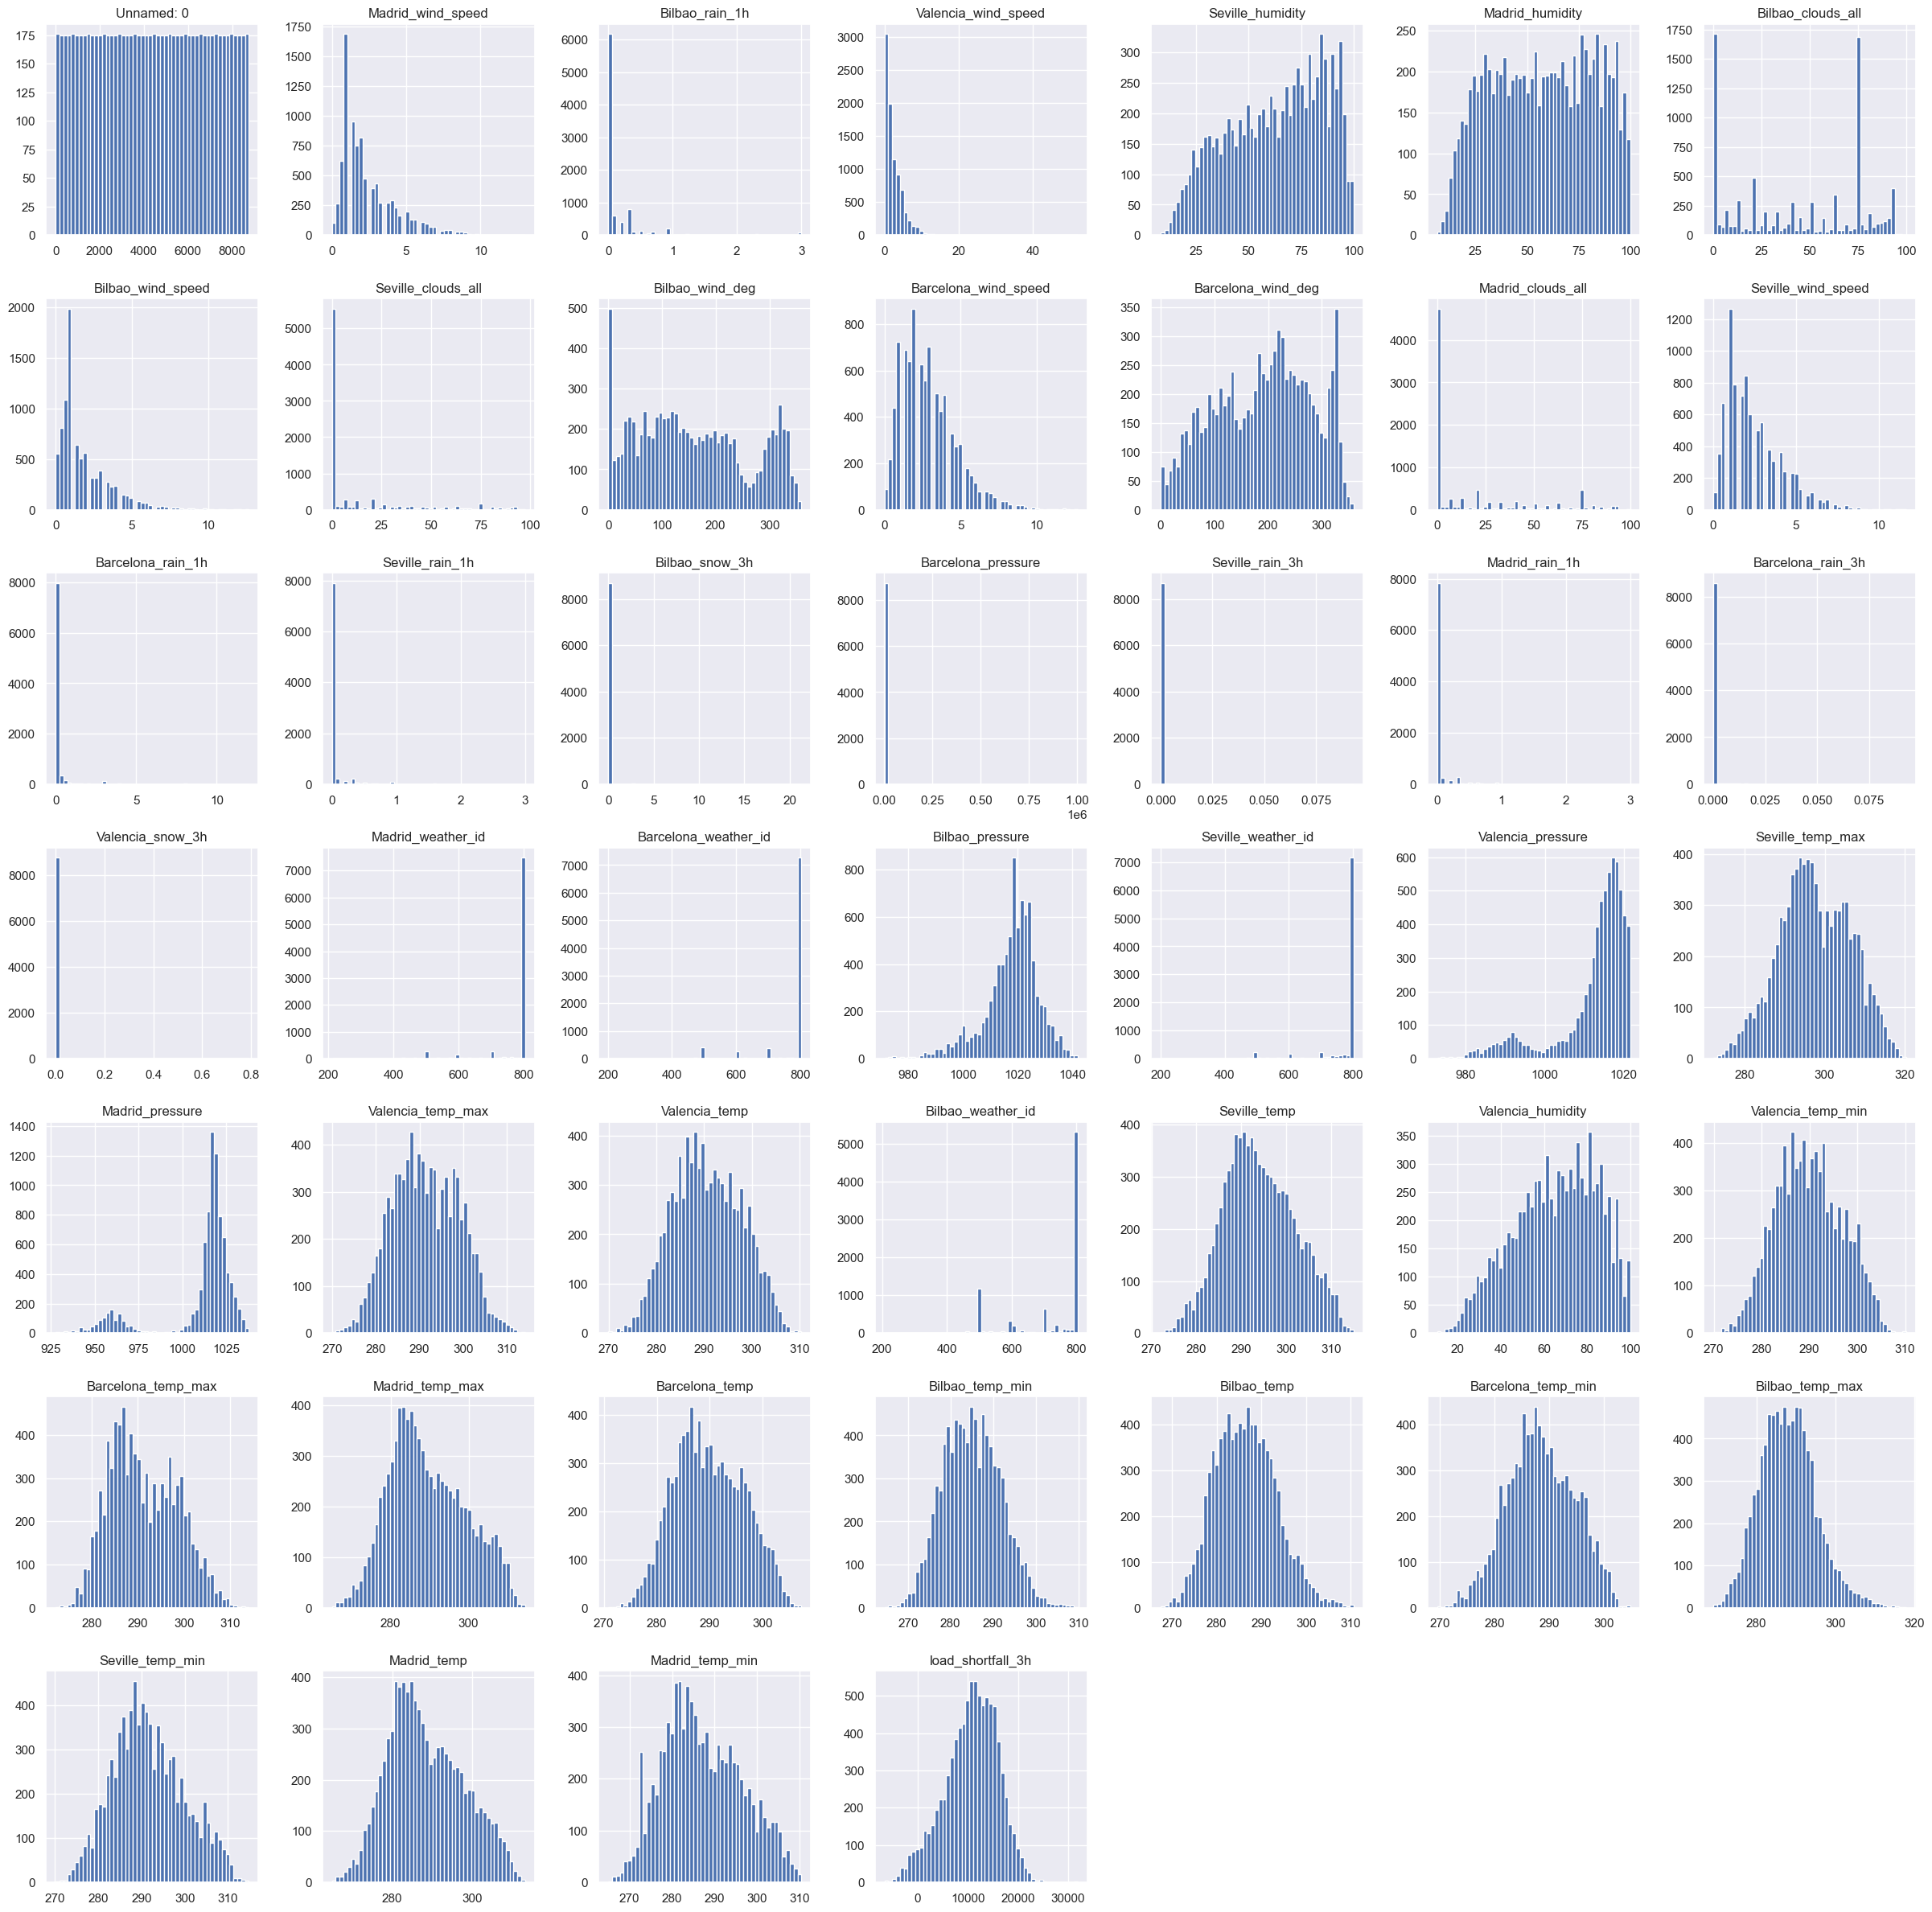

In [13]:
#Visualising Skewness of all features
df_train.hist(figsize=(30,30), bins=50)

In [12]:
#Function to check skewness
def describe_skewness(x):
    if (x > -0.5) and (x < 0.5):
        skewness = 'Fairly Symmetrical'
    elif (x > -1) and (x < -0.5):
        skewness = 'Moderate Negative Skew'
    elif (x > 0.5) and (x < 1):
        skewness = 'Moderate Positive Skew'
    elif x < -1:
        skewness = 'High Negative Skew'
    elif x > 1:
        skewness = 'High Positve Skew'
    return skewness

In [14]:
# Skewness of the numerical features

data_skew = df_train.skew()
skew_df = pd.DataFrame(
    {'Feature': data_skew.index, 'Skewness': data_skew.values})
skewdf_sorted = skew_df.sort_values(
    'Skewness').reset_index().drop('index', axis=1)
skewdf_sorted['Skewness Description'] = skewdf_sorted['Skewness'].apply(
    describe_skewness)
skewdf_sorted

,Feature,Skewness,Skewness Description
0,Seville_weather_id,-3.275574,High Negative Skew
1,Madrid_weather_id,-3.107722,High Negative Skew
2,Barcelona_weather_id,-2.584011,High Negative Skew
3,Madrid_pressure,-1.850768,High Negative Skew
4,Valencia_pressure,-1.705162,High Negative Skew
5,Bilbao_weather_id,-1.234844,High Negative Skew
6,Bilbao_pressure,-0.999642,Moderate Negative Skew
7,load_shortfall_3h,-0.384847,Fairly Symmetrical
8,Seville_humidity,-0.310175,Fairly Symmetrical
9,Valencia_humidity,-0.305757,Fairly Symmetrical


In [ ]:
col_names = df_train.columns

numerical_features = [x for x in col_names if not x in categorical_features]
categorical_features = df_train['Seville_pressure',
                                'Valencia_wind_deg', 'time']


In [ ]:
df_test = df_test.drop('Unnamed: 0', axis=1)
df_test.head()

<a id="four"></a>
## 4. Data Processing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


## 4.1. Exploratory Data Analysis


 mu = 10673.86 and sigma = 5217.75



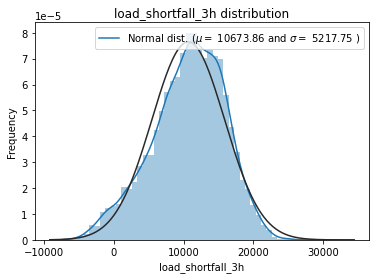

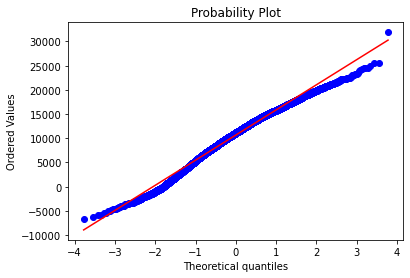

In [7]:
# look at data statistics
sns.distplot(df_train['load_shortfall_3h'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['load_shortfall_3h'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('load_shortfall_3h distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['load_shortfall_3h'], plot=plt)
plt.show()

In [8]:
print(skew(df_train['load_shortfall_3h']))

-0.3847811918590848


In [9]:
# plot relevant feature interactions

In [10]:
# evaluate correlation


In [11]:
abs(df_train.corr()['load_shortfall_3h']).head(3)

Madrid_wind_speed      0.150981
Bilbao_rain_1h         0.152510
Valencia_wind_speed    0.142791
Name: load_shortfall_3h, dtype: float64

In [1]:
plt.figure(figsize=(40, 40))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


NameError: name 'plt' is not defined

<AxesSubplot:>

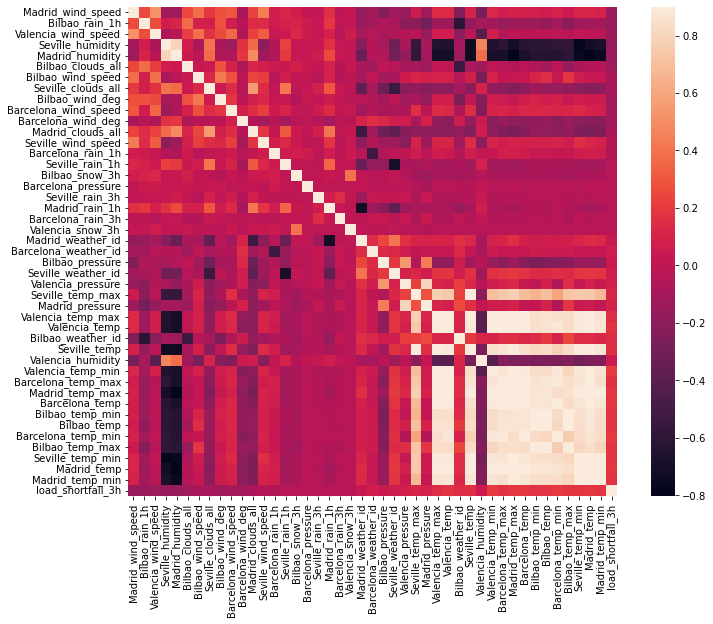

In [12]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [13]:
# have a look at feature distributions

<a id="five"></a>
## 5. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

#### 5.1. Data Cleaning

In [45]:
df_train_eng = df_train.copy()
df_test_eng = df_test.copy()


In [46]:
# remove missing values/ features
# Checking for null values

df_train_eng.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

[Text(0.5, 1.0, 'Valencia_pressure Boxplot')]

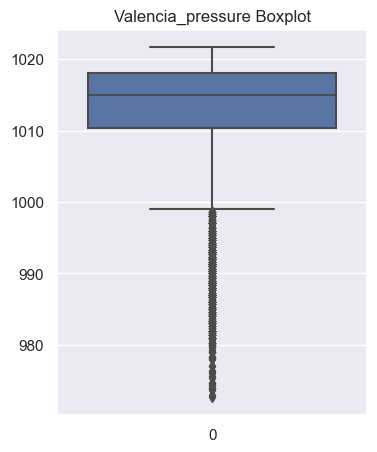

In [47]:
plt.figure(figsize=(4, 5))
sns.boxplot(data=df_train_eng['Valencia_pressure'], orient='v').set(
    title='Valencia_pressure Boxplot')

In [48]:
#checking the percent of Null values in Valencia_pressure
def Valencia_pressure_null_Percentange(x=df_train_eng['Valencia_pressure']):
    print(f'Valencia_pressure Null Percentange = {round(x.isnull().sum() / x.notnull().count()*100, 1)}{"%"}')

Valencia_pressure_null_Percentange()

Valencia_pressure Null Percentange = 23.6%


In [49]:
#checking the percent of Null values in Valencia_pressure
def Valencia_pressure_null_Percentange(x=df_test_eng['Valencia_pressure']):
    print(f'Valencia_pressure Null Percentange = {round(x.isnull().sum() / x.notnull().count()*100, 1)}{"%"}')

Valencia_pressure_null_Percentange()

Valencia_pressure Null Percentange = 15.5%


In [50]:
# Summary Statistics of Valencia_pressure
def Valencia_pressure_summary(x=df_train_eng['Valencia_pressure']):
    """_summary_

    Args:
        x (Dataframe series): Finds the mean mode and the median of args 
        and prints is out. Defaults to df_train_eng['Valencia_pressure'].
    """
    print(f' Valencia_pressured median = {x.median()}\n')
    print(f' Valencia_pressured mean = {round(x.mean(),2)}\n')
    print(f' Valencia_pressured mode = {x.mode()[0]}\n')


Valencia_pressure_summary()


 Valencia_pressured median = 1015.0

 Valencia_pressured mean = 1012.05

 Valencia_pressured mode = 1018.0



In [51]:
# Replace Null Values for Valencia_pressure (train data)
df_train_eng['Valencia_pressure'] = df_train_eng['Valencia_pressure'].fillna(
    df_train_eng['Valencia_pressure'].mode()[0])

In [52]:
# Replace Null Values for Valencia_pressure (test data)
df_test_eng['Valencia_pressure'] = df_test_eng['Valencia_pressure'].fillna(
    df_test_eng['Valencia_pressure'].mode()[0])

In [53]:
#Verifying Valencia_pressure null fix
print(df_train_eng['Valencia_pressure'].isnull().sum())
print(df_test_eng['Valencia_pressure'].isnull().sum())

0
0


#### 5.2. Feature Selection

In [54]:
# create new features

In [55]:
# Extract number part from Valencia_wind_deg
df_train_eng['Valencia_wind_deg'] = df_train_eng['Valencia_wind_deg'].str.extract('(\d+)')
df_test_eng['Valencia_wind_deg'] = df_test_eng['Valencia_wind_deg'].str.extract('(\d+)')

# Change Valencia_wind_deg feature type to Numeric
df_train_eng['Valencia_wind_deg'] = pd.to_numeric(
    df_train_eng['Valencia_wind_deg'])
df_test_eng['Valencia_wind_deg'] = pd.to_numeric(
    df_test_eng['Valencia_wind_deg'])


In [56]:
# Extract number part from Seville_pressure
df_train_eng['Seville_pressure'] = df_train_eng['Seville_pressure'].str.extract('(\d+)')
df_test_eng['Seville_pressure'] = df_test_eng['Seville_pressure'].str.extract('(\d+)')

# Change Seville_pressure feature type to Numeric
df_train_eng['Seville_pressure'] = pd.to_numeric(
    df_train_eng['Seville_pressure'])
df_test_eng['Seville_pressure'] = pd.to_numeric(
    df_test_eng['Seville_pressure'])


In [57]:
df_train_eng.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   int64  
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [58]:
#Removing the index column "Unnamed' for train dataset
df_train_eng = df_train_eng.drop('Unnamed: 0', axis=1)
df_train_eng.head(1)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.0,0.0,1.0,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.0,800.0,1002.666667,274.254667,971.333333,269.888,269.888,800.0,274.254667,75.666667,269.888,281.013,265.938,281.013,269.338615,269.338615,281.013,269.338615,274.254667,265.938,265.938,6715.666667


In [59]:
#Removing the index column "Unnamed' for test dataset
df_test_eng = df_test_eng.drop('Unnamed: 0', axis=1)
df_test_eng.head(1)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,2018-01-01 00:00:00,5.0,8,0.0,5.0,87.0,71.333333,20.0,3.0,0.0,193.333333,4.0,176.666667,0.0,1.0,0.0,25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.0,1025.666667,800.0,1016.0,284.483333,1030.0,287.483333,287.483333,801.0,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.15,280.38,286.816667,285.15,283.15,279.866667,279.15


In [60]:
#Convert index of train dataset to Datetime type
df_train_eng['time'] = pd.to_datetime(df_train_eng['time'])
df_train_eng.head(1)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.0,0.0,1.0,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.0,800.0,1002.666667,274.254667,971.333333,269.888,269.888,800.0,274.254667,75.666667,269.888,281.013,265.938,281.013,269.338615,269.338615,281.013,269.338615,274.254667,265.938,265.938,6715.666667


In [61]:
#Convert index of test dataset to Datetime type
df_test_eng['time'] = pd.to_datetime(df_test_eng['time'])
df_test_eng.head(1)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,2018-01-01,5.0,8,0.0,5.0,87.0,71.333333,20.0,3.0,0.0,193.333333,4.0,176.666667,0.0,1.0,0.0,25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.0,1025.666667,800.0,1016.0,284.483333,1030.0,287.483333,287.483333,801.0,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.15,280.38,286.816667,285.15,283.15,279.866667,279.15


In [62]:
# set time features of both train and test dataframe repective index
df_train_eng = df_train_eng.set_index('time')
df_test_eng = df_test_eng.set_index('time')

In [63]:
df_train_eng.head(1)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.0,0.0,1.0,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.0,800.0,1002.666667,274.254667,971.333333,269.888,269.888,800.0,274.254667,75.666667,269.888,281.013,265.938,281.013,269.338615,269.338615,281.013,269.338615,274.254667,265.938,265.938,6715.666667


In [65]:
df_test_eng.head(1)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,5.0,8,0.0,5.0,87.0,71.333333,20.0,3.0,0.0,193.333333,4.0,176.666667,0.0,1.0,0.0,25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.0,1025.666667,800.0,1016.0,284.483333,1030.0,287.483333,287.483333,801.0,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.15,280.38,286.816667,285.15,283.15,279.866667,279.15


In [66]:
# Function that adds new time series features base on datetime index
def new_time_features(df):
    """_summary_

    Args:
        df (Dataframe): pandas dataframe with type Datetime  as index

    Returns:
        Dataframe: with 8 new additional features bases on time series index
    """

    df['Year'] = df.index.year
    df['Quarter'] = df.index.quarter
    df['Month'] = df.index.month
    df['Week'] = df.index.isocalendar().week
    df['Day_of_week'] = df.index.dayofweek
    df['Day_of_year'] = df.index.dayofyear
    df['Year'] = df.index.year
    df['Hour'] = df.index.hour

    return df


#Creating new time series features for both train and test dataset with a function call
df_train_eng = new_time_features(df_train_eng)
df_test_eng = new_time_features(df_test_eng)


In [67]:

df_test_eng.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2920 entries, 2018-01-01 00:00:00 to 2018-12-31 21:00:00
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     2920 non-null   float64
 1   Valencia_wind_deg     2920 non-null   int64  
 2   Bilbao_rain_1h        2920 non-null   float64
 3   Valencia_wind_speed   2920 non-null   float64
 4   Seville_humidity      2920 non-null   float64
 5   Madrid_humidity       2920 non-null   float64
 6   Bilbao_clouds_all     2920 non-null   float64
 7   Bilbao_wind_speed     2920 non-null   float64
 8   Seville_clouds_all    2920 non-null   float64
 9   Bilbao_wind_deg       2920 non-null   float64
 10  Barcelona_wind_speed  2920 non-null   float64
 11  Barcelona_wind_deg    2920 non-null   float64
 12  Madrid_clouds_all     2920 non-null   float64
 13  Seville_wind_speed    2920 non-null   float64
 14  Barcelona_rain_1h     2920 non-null 

In [68]:
# Correlations of regressor and the regressand
corrs = df_train_eng[df_train_eng['load_shortfall_3h'].notnull()].corr(
)['load_shortfall_3h'].sort_values(ascending=False)


In [40]:
#df_train_eng = df_train_eng.drop('Week', axis=1)

In [69]:
#Checking correlations of each regressor and the regressand

from scipy.stats import pearsonr

# Dictionary to pair the coefficients and p-values
my_dict = {}

col_titles = [x for x in corrs.index if x!= 'load_shortfall_3h']
for x in col_titles:
    p_val = round(pearsonr(df_train_eng[df_train_eng['load_shortfall_3h'].notnull(
    )][x], df_train_eng[df_train_eng['load_shortfall_3h'].notnull()]['load_shortfall_3h'])[1], 6)
    my_dict[x] = {'Correlation_Coefficient': corrs[x], 'P_Value': p_val}

my_dict = pd.DataFrame(my_dict).T
my_dict = my_dict.sort_values('P_Value')
my_dict[my_dict['P_Value'] < 0.1]


,Correlation_Coefficient,P_Value
Quarter,0.210551,0.000000
Valencia_pressure,0.090405,0.000000
Barcelona_weather_id,0.063868,0.000000
Seville_weather_id,0.061104,0.000000
Seville_humidity,-0.167290,0.000000
Barcelona_rain_1h,-0.056633,0.000000
Bilbao_wind_speed,-0.081602,0.000000
Madrid_clouds_all,-0.081623,0.000000
Seville_clouds_all,-0.091804,0.000000
Barcelona_wind_speed,-0.103633,0.000000


Above shows that each features has a significant importance

### Checking and Fixing Multicollinearity 

In [149]:
df_train_eng2 = df_train_eng.copy()

In [115]:
#df_train_eng2 = df_train_eng2.drop(columns='Week')

In [ ]:
df_train_eng2.info()

In [150]:
#Selecting Predictors or Regressors variables.
X = df_train_eng2.drop(columns='load_shortfall_3h', axis=1)

In [151]:
#Selecting Responses or Regressand variables.
y = df_train_eng2['load_shortfall_3h']

In [152]:
# splitting data df_train into trian and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 100)

In [153]:
#Investigating train and test splits
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}\n')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')


X_train : (7010, 53)
y_train : (7010,)

X_test : (1753, 53)
y_test : (1753,)


#### Fixing Skewness

In [123]:
from scipy.stats import skew, skewtest, norm
import scipy.stats as st
from scipy.stats import kurtosis
from scipy.stats import boxcox


##### Checking the distribution of our 'Target Variable' --> load_shortfall_3h

In [124]:
y.describe()


count     8763.000000
mean     10673.857612
std       5218.046404
min      -6618.000000
25%       7390.333333
50%      11114.666667
75%      14498.166667
max      31904.000000
Name: load_shortfall_3h, dtype: float64

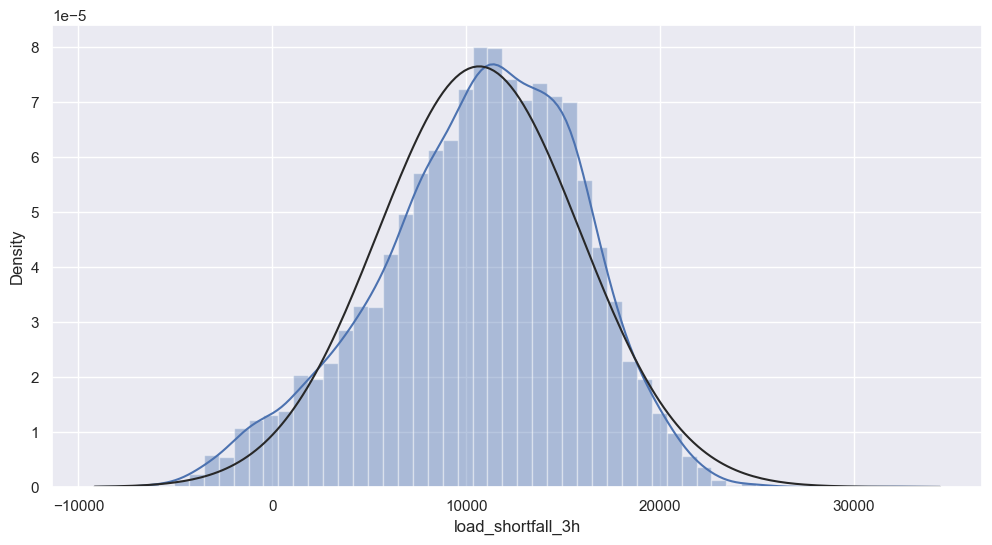

In [159]:
#checking the distribution
plt.figure(figsize=(12, 6))
sns.distplot(y, fit=norm)
plt.show()


In [127]:
print("Skew of raw data: %f" % y.skew()) #check skewness
print("Kurtosis of raw data: %f" % kurtosis(y,fisher = False)) #check kurtosis

Skew of raw data: -0.384847
Kurtosis of raw data: 2.880384


In [122]:
data_skew = df_train.skew()
skew_df = pd.DataFrame(
    {'Feature': data_skew.index, 'Skewness': data_skew.values})
skewdf_sorted = skew_df.sort_values(
    'Skewness').reset_index().drop('index', axis=1)
skewdf_sorted['Skewness Description'] = skewdf_sorted['Skewness'].apply(
    describe_skewness)
skewdf_sorted


,Feature,Skewness,Skewness Description
0,Seville_weather_id,-3.275574,High Negative Skew
1,Madrid_weather_id,-3.107722,High Negative Skew
2,Barcelona_weather_id,-2.584011,High Negative Skew
3,Madrid_pressure,-1.850768,High Negative Skew
4,Valencia_pressure,-1.705162,High Negative Skew
5,Bilbao_weather_id,-1.234844,High Negative Skew
6,Bilbao_pressure,-0.999642,Moderate Negative Skew
7,load_shortfall_3h,-0.384847,Fairly Symmetrical
8,Seville_humidity,-0.310175,Fairly Symmetrical
9,Valencia_humidity,-0.305757,Fairly Symmetrical


In [ ]:
X_train['Valencia_snow_3h', 'Barcelona_pressure',
        'Bilbao_snow_3h', 'Seville_rain_3h',
        'Barcelona_rain_3h', 'Barcelona_rain_1h',
        'Seville_rain_1h', 'Madrid_rain_1h', ]


#### Feature Selection Using Correlation


In [154]:
#Check correlation of regressors
X_train.corr()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Year,Quarter,Month,Week,Day_of_week,Day_of_year,Hour
Madrid_wind_speed,1.000000,0.119749,0.263512,0.514627,-0.120415,-0.137936,0.247265,0.373528,0.194954,0.269960,0.295836,-0.094359,0.231252,0.434009,0.068995,-0.180652,0.101536,0.079375,0.010888,-0.000018,0.142262,-0.014854,0.026452,-0.165518,-0.102591,-0.229775,-0.113653,-0.193376,0.054313,-0.139492,0.133228,0.127921,-0.248953,0.095727,-0.280979,0.118546,0.061721,0.094253,0.077968,0.080332,0.063436,0.084930,0.044714,0.114959,0.112096,0.099951,-0.027977,-0.245766,-0.241079,-0.238423,0.011758,-0.242752,0.192302
Valencia_wind_deg,0.119749,1.000000,0.203565,0.287855,0.231324,0.247481,0.158134,0.073522,0.088612,0.157853,0.043511,0.152150,0.101713,-0.010245,-0.005041,0.286043,-0.024019,0.073284,0.027951,-0.022665,-0.018021,0.015915,0.025485,-0.004682,-0.009081,-0.094327,0.005571,-0.155809,-0.327115,-0.191142,-0.243210,-0.249620,-0.213298,-0.339337,-0.198021,-0.252676,-0.255964,-0.338527,-0.253953,-0.263048,-0.280401,-0.232337,-0.290501,-0.308070,-0.333694,-0.309086,-0.050863,-0.148940,-0.146350,-0.141426,0.011055,-0.145939,-0.130531
Bilbao_rain_1h,0.263512,0.203565,1.000000,0.258237,0.065339,0.101182,0.365458,0.090146,0.091368,0.276515,0.064797,-0.029989,0.131971,0.134982,0.056792,0.072036,0.082669,0.101182,0.052414,0.013663,0.159934,-0.006006,0.008006,-0.137015,-0.120469,-0.054156,-0.088936,-0.231520,-0.197164,-0.301265,-0.126486,-0.119750,-0.599336,-0.159151,-0.114588,-0.109257,-0.149644,-0.141885,-0.131921,-0.136291,-0.177258,-0.100819,-0.214272,-0.112015,-0.129054,-0.109003,-0.200072,-0.189981,-0.183116,-0.174237,0.040532,-0.176550,0.056319
Valencia_wind_speed,0.514627,0.287855,0.258237,1.000000,-0.082656,-0.029058,0.210894,0.388444,0.162188,0.240624,0.344882,-0.063307,0.217779,0.308954,0.030452,-0.070489,0.036344,0.130661,0.052578,0.027263,0.091005,-0.035827,0.078531,-0.097318,-0.030284,-0.098689,-0.059944,-0.077300,-0.007483,-0.147766,0.073823,0.079643,-0.195870,0.003967,-0.415982,0.082453,-0.033928,-0.011952,-0.015836,-0.001356,-0.012859,0.004548,-0.022640,0.011868,-0.002587,-0.010649,-0.006146,-0.228800,-0.230715,-0.224817,0.018346,-0.229456,0.205882
Seville_humidity,-0.120415,0.231324,0.065339,-0.082656,1.000000,0.799734,0.062607,-0.087798,0.394296,-0.088266,-0.132859,0.160586,0.362590,-0.204137,-0.042413,0.221023,0.226249,0.022251,0.023897,0.027464,0.167632,0.019626,0.005854,-0.233268,-0.051851,-0.091969,-0.321206,-0.042442,-0.559467,-0.093733,-0.650531,-0.662098,-0.098154,-0.739570,0.466691,-0.655711,-0.606987,-0.706929,-0.617446,-0.604195,-0.603302,-0.594074,-0.582366,-0.783081,-0.715457,-0.686123,-0.044207,-0.103831,-0.113041,-0.095603,0.004994,-0.107874,-0.425502
Madrid_humidity,-0.137936,0.247481,0.101182,-0.029058,0.799734,1.000000,0.041438,-0.012394,0.369717,-0.068664,-0.056056,0.187869,0.481276,-0.126308,-0.058392,0.303581,0.194559,0.029179,0.027624,0.053720,0.252718,0.019418,0.009613,-0.344762,-0.052365,-0.045787,-0.283626,-0.079934,-0.573514,-0.109865,-0.706717,-0.707218,-0.133273,-0.737703,0.376069,-0.689652,-0.694065,-0.803254,-0.686543,-0.633874,-0.633120,-0.637902,-0.609617,-0.769033,-0.802493,-0.757913,-0.082668,-0.070529,-0.079488,-0.057374,-0.000304,-0.073044,-0.310506
Bilbao_clouds_a

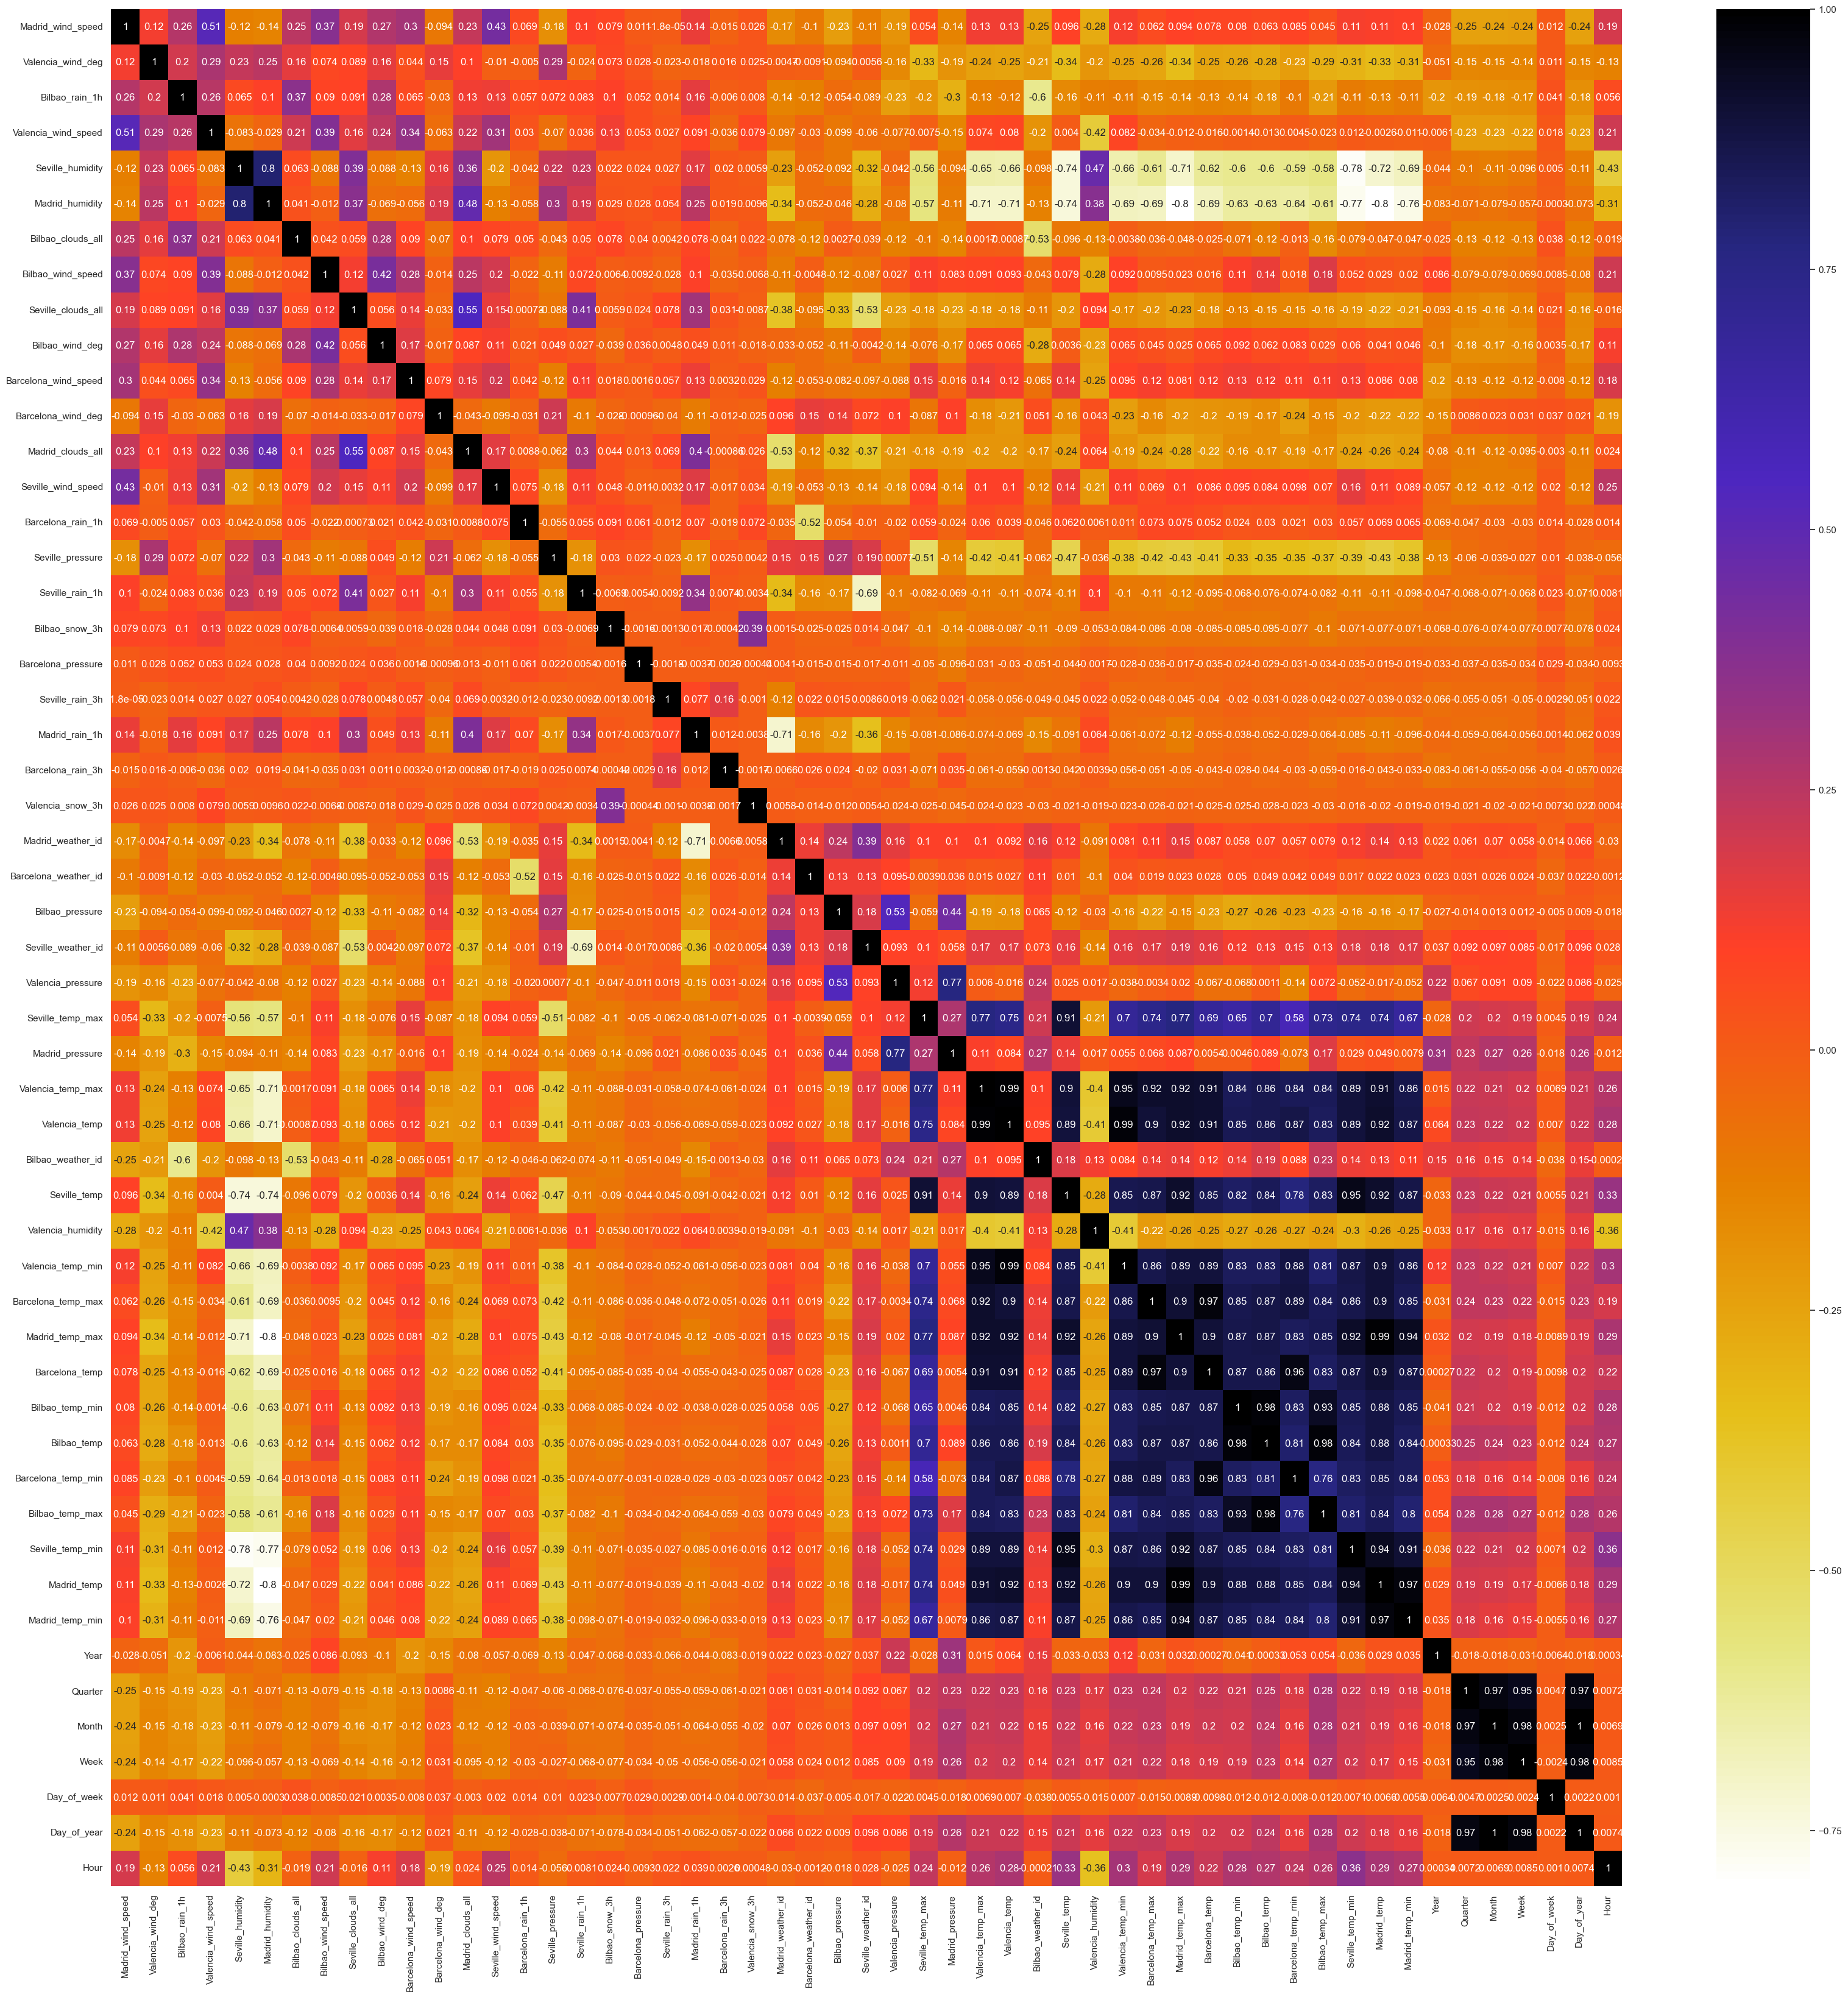

In [155]:
#Visualise Correlation Using Pearson Correlation
plt.figure(figsize=(40, 40))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [156]:
#Function to traverse through the correlation Matrix and based on a threshold remove a feature
def correlation(df, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # we are interested in absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold:
                column_name = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(column_name)
    return col_corr

#https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/2-Feature%20Selection-%20Correlation.ipynb


In [157]:
to_drop_features = correlation(X_train, 0.90)
len(set(to_drop_features))

15

In [158]:
#Features to be dropped bases on correlation analysis
to_drop_features

{'Barcelona_temp',
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Day_of_year',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Month',
 'Seville_temp',
 'Seville_temp_min',
 'Valencia_temp',
 'Valencia_temp_min',
 'Week'}

In [140]:
X_train = X_train.drop(to_drop_features, axis=1)
X_test = X_test.drop(to_drop_features,axis=1)

#### Fixing Multicollinearity with Variable Inflation Factor(VIF)

In [ ]:
""""# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#function to check and for each regressor's VIF
def calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


#Tabulate regressors against VIF values
calculate_vif(X_train)


#https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/""""

#### Dropping one of correlated features

In [ ]:
#X.columns

In [ ]:
#X = X.drop(['Seville_pressure'], axis=1)


#calculate_vif(X)


In [18]:
# engineer existing features
#changing non numeric columns to numeric
df_train['Valencia_wind_deg']= df_train['Valencia_wind_deg'].str.extract('(\d+)')
df_train['Valencia_wind_deg']= pd.to_numeric(df_train['Valencia_wind_deg'])

df_train.Seville_pressure = df_train.Seville_pressure.str.extract('(\d+)')
df_train.Seville_pressure = pd.to_numeric(df_train.Seville_pressure)

In [19]:
#Fixing the timedate feature so it can be used in the models

df_train['time'] = pd.to_datetime(df_train['time'])

df_train['date_year'] = df_train['time'].dt.year 
df_train['date_month_no'] = df_train['time'].dt.month
df_train['date_day'] = df_train['time'].dt.day

df_train['hour'] = df_train['time'].dt.hour
df_train = df_train.drop(['time'], axis = 1)

In [23]:
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)



Skew in numerical features: 



,Skew
Valencia_snow_3h,63.287249
Barcelona_pressure,57.969739
Bilbao_snow_3h,26.173087
Seville_rain_3h,19.339263
Barcelona_rain_3h,12.694432
Barcelona_rain_1h,8.725494
Seville_rain_1h,8.065960
Madrid_rain_1h,7.073097
Bilbao_rain_1h,5.221908
Valencia_wind_speed,3.499037


skewness = 0 : normally distributed.

skewness > 0 : more weight in the left tail of the distribution.

skewness < 0 : more weight in the right tail of the distribution.

#### Box Cox Transformation of (highly) skewed features

We use the scipy  function boxcox1p which computes the Box-Cox transformation of **\\(1 + x\\)**. 

See [3] for more details on Box Cox Transformation as well as [4]

#### WIll run this later. Skipping for now
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df_train[feat] = boxcox1p(df_train[feat], lam)

In [24]:
df_train.head(3)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,date_year,date_month_no,date_day,hour
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,...,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,...,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,214.333333,...,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9


In [25]:
clean_train = df_train

### Data processing for test data

The same step for done to process the train data set were repeated for the test data set

In [26]:
# remove missing values/ features
# Checking for null values

df_test.isnull().sum()

time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp              0
Valencia_humidity   

In [27]:
print("Mode")
print(df_test['Valencia_pressure'].mode())

print("Meam")
print(df_test['Valencia_pressure'].mean())

print("Median")
print(df_test['Valencia_pressure'].median())

Mode
0    1016.0
Name: Valencia_pressure, dtype: float64
Meam
1013.1483509056495
Median
1014.6666666667


In [28]:
df_test['Valencia_pressure']= df_test['Valencia_pressure'].fillna(df_test['Valencia_pressure'].mode()[0])

In [29]:
df_test['Valencia_wind_deg']= df_test['Valencia_wind_deg'].str.extract('(\d+)')
df_test['Valencia_wind_deg']= pd.to_numeric(df_test['Valencia_wind_deg'])

In [30]:
df_test.Seville_pressure = df_test.Seville_pressure.str.extract('(\d+)')
df_test.Seville_pressure = pd.to_numeric(df_test.Seville_pressure)

In [31]:
df_test['time'] = pd.to_datetime(df_test['time'])

df_test['date_year'] = df_test['time'].dt.year 
df_test['date_month_no'] = df_test['time'].dt.month
df_test['date_day'] = df_test['time'].dt.day

df_test['hour'] = df_test['time'].dt.hour
df_test = df_test.drop(['time'], axis = 1)

In [32]:
df_test.head(3)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,date_year,date_month_no,date_day,hour
0,5.000000,8,0.0,5.000000,87.0,71.333333,20.0,3.000000,0.000000,193.333333,...,280.380000,286.816667,285.15,283.150000,279.866667,279.15,2018,1,1,0
1,4.666667,8,0.0,5.333333,89.0,78.000000,0.0,3.666667,0.000000,143.333333,...,281.010000,283.483333,284.15,281.150000,279.193333,278.15,2018,1,1,3
2,2.333333,7,0.0,5.000000,89.0,89.666667,0.0,2.333333,6.666667,130.000000,...,279.196667,281.816667,282.15,280.483333,276.340000,276.15,2018,1,1,6


In [33]:
clean_test = df_test

In [34]:
print(clean_train.shape)
print(clean_test.shape)

(8763, 51)
(2920, 50)


<a id="six"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

We use the **cross_val_score** function of Sklearn. However this function has not a shuffle attribut, we add then one line of code,  in order to shuffle the dataset  prior to cross-validation

In [35]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(clean_train.values)
    rmse= np.sqrt(-cross_val_score(model, clean_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

The data is split for Hold-out_validation

In [36]:
# Split the data into X & y

y_train = clean_train.load_shortfall_3h.values
clean_train = clean_train.drop(['load_shortfall_3h'], axis=1)


In [37]:
# split data

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

### Base Models

#### 1. Gradient Boosting Regression :

In [38]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

#### 2. XGBoost :

In [39]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

#### 3. LightGBM :

In [40]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

#### 4. RandomForest

In [41]:
#Add more models

<a id="seven"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

The perfomance of the the base models were evaluated using the cross-validation rmsle error

In [42]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 4164.1072 (121.5695)



In [43]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[07:34:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[07:34:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[07:34:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[07:34:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[07:34:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

Xgboost score: 4170.

In [44]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

<a id="eight"></a>
## 8. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
 

#### 8.1. Gradient Boosting Regression 

#### 8.2. XGBoost 

#### 8.3. LightGBM

#### 8.4. Random Forest

#### Chosen Model :

In [20]:
# discuss chosen methods logic

<a id="nine"></a>
## 9. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |


<a id="ten"></a>
## 10. Referencess
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |


[1] Environmental Protection Agency. (n.d.). EPA. Retrieved November 4, 2022, from https://www.epa.gov/statelocalenergy/local-renewable-energy-benefits-and-resources 

[2] Centric Consulting (2021) Machine learning: A quick introduction and five core steps, Centric Consulting. Available at: https://centricconsulting.com/blog/machine-learning-a-quick-introduction-and-five-core-steps/ (Accessed: November 4, 2022). 

[3] http://onlinestatbook.com/2/transformations/box-cox.html

[4] https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html